<a href="https://colab.research.google.com/github/GitZy6666/ZyRep/blob/main/Plotting_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install heartpy

     |████████████████████████████████| 1.0MB 6.0MB/s 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('Patient3.csv')
# dataTimes = pd.read_csv('Times.csv')

In [ ]:
data.tail()

,Time,Pleth,II
20510,00:45:22.900,-93,24.17
20511,00:45:23.000,-94,24.40
20512,00:45:23.000,-95,21.28
20513,00:45:23.000,-95,44.13
20514,00:45:23.000,-94,NaN


In [ ]:
ECG = data['II']
PPG = data['Pleth']
Time = data['Time']
# Time = Time[:19144]
# Times = dataTimes['Times']

In [ ]:
# import heartpy as hp
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet

In [ ]:
sigma = 0.5
x_noisy = ECG + sigma * np.random.randn(ECG.size)
x_denoise = denoise_wavelet(x_noisy, wavelet='db6', mode='soft', wavelet_levels=3, method='VisuShrink', rescale_sigma=True)

In [ ]:
help(hp.get_samplerate_datetime)

Help on function get_samplerate_datetime in module heartpy.datautils:

get_samplerate_datetime(datetimedata, timeformat='%H:%M:%S.%f')
    determine sample rate based on datetime
    
    Function to determine sample rate of data from datetime-based timer
    list or array.
    
    Parameters
    ----------
    timerdata : 1-d numpy array or list
        sequence containing datetime strings
    
    timeformat : string
        the format of the datetime-strings in datetimedata
        default : '%H:%M:%S.f' (24-hour based time including ms: e.g. 21:43:12.569)
    
    Returns
    -------
    out : float
        the sample rate as determined from the timer sequence provided
    
    Examples
    --------
    We load the data like before
    
    >>> data, timer = load_exampledata(example = 2)
    >>> timer[0]
    '2016-11-24 13:58:58.081000'
    
    Note that we need to specify the timeformat used so that datetime understands
    what it's working with:
    
    >>> round(get_samplera

In [ ]:
sample_rate = hp.get_samplerate_datetime(Time, timeformat = '%H:%M:%S.%f')

print('sampling rate is: %.3f Hz' %sample_rate)

sampling rate is: 50.099 Hz


In [ ]:
EKG = ECG[0:6000]

In [ ]:
denoise = hp.filter_signal(EKG, 
                                cutoff = [0.8, 2.5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

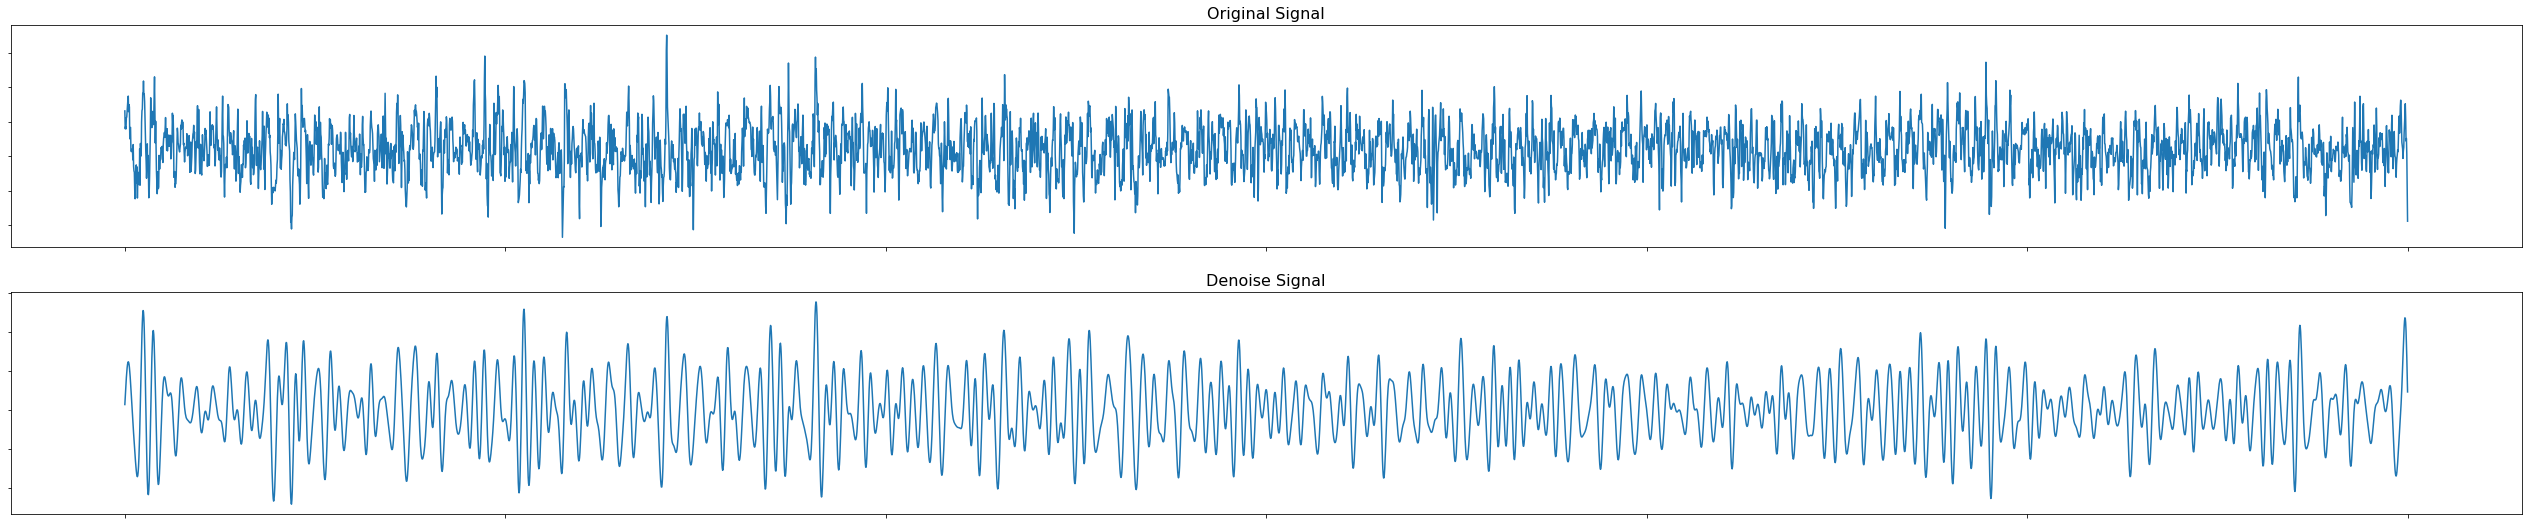

In [ ]:
plt.figure(figsize=(45,9)) #atur ratio plot
plt.subplot(211)
plt.plot(EKG)
plt.title('Original Signal', fontsize=16)
# plt.xlabel('Time(s)')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

plt.subplot(212)
plt.plot(denoise)
plt.title('Denoise Signal', fontsize=16)
# plt.xlabel('Time(s)')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.savefig("Denoising P1 (13.51k_15.51k).png")
plt.show()

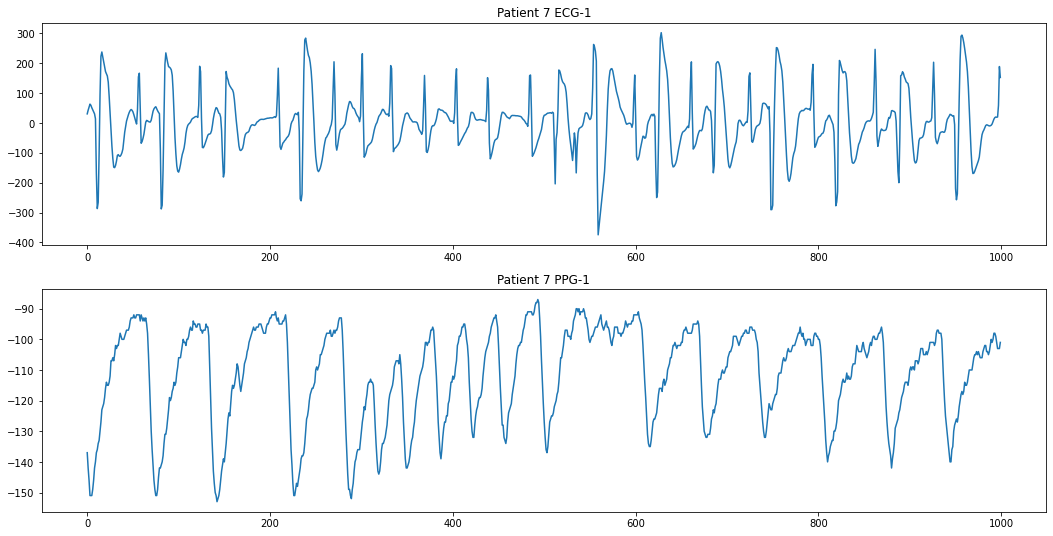

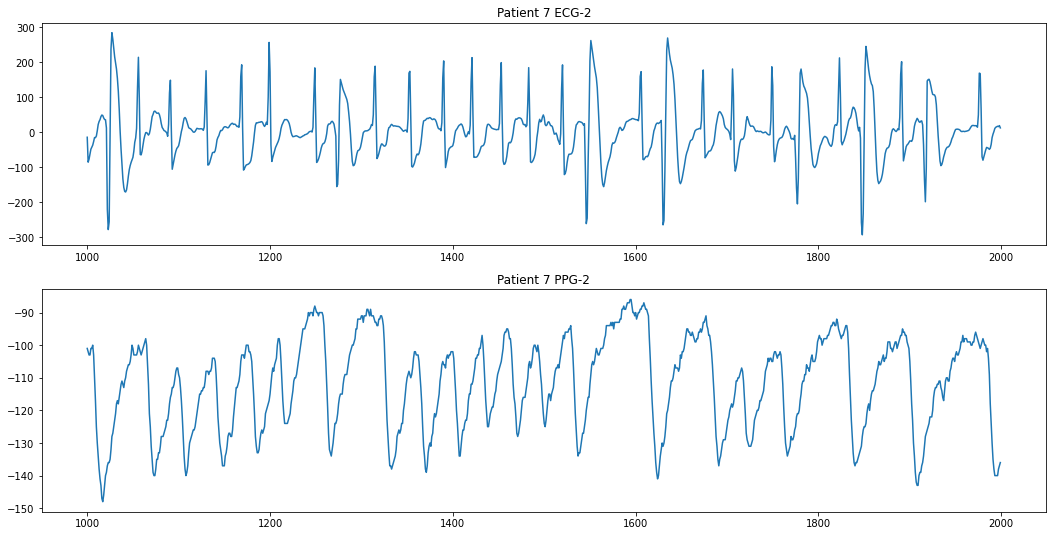

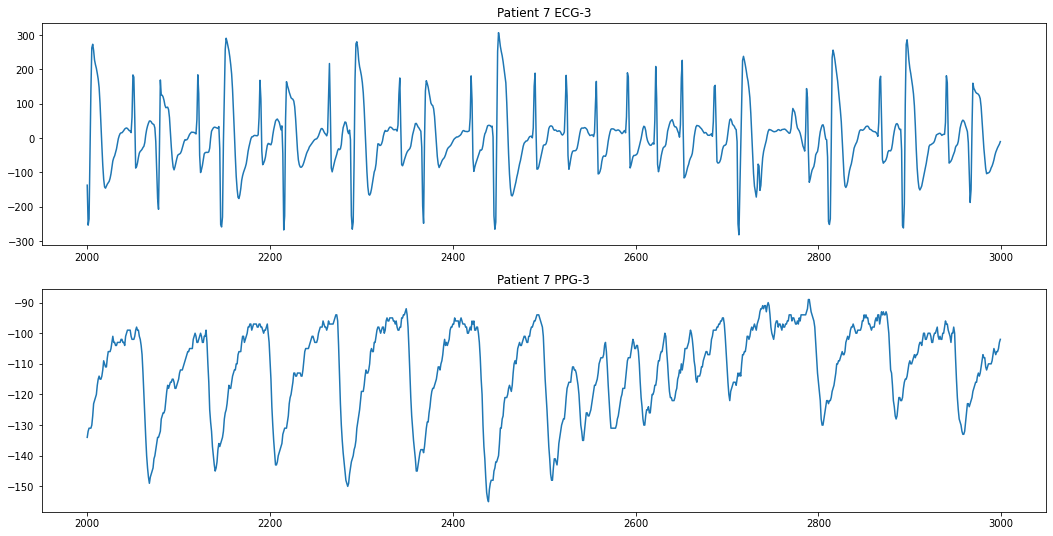

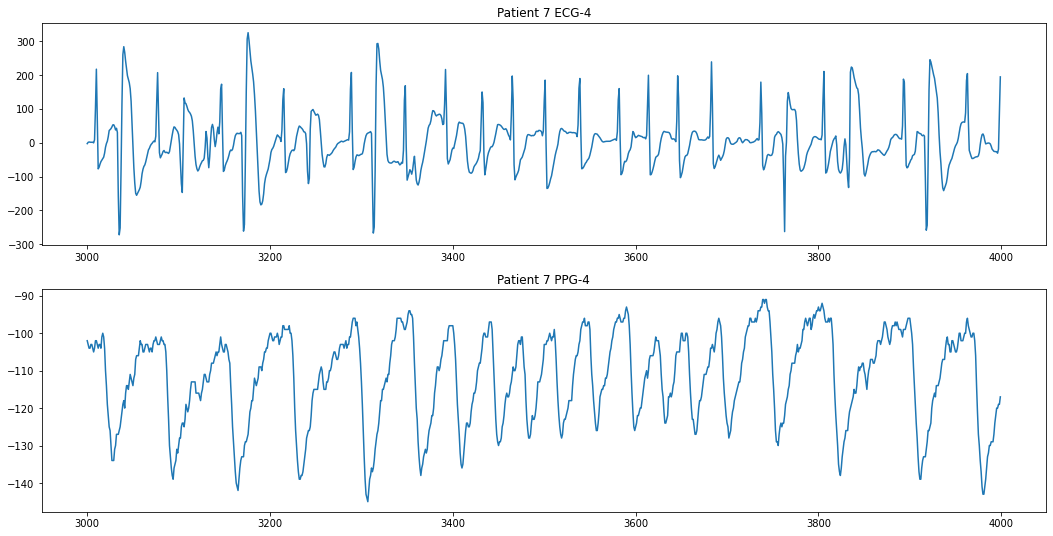

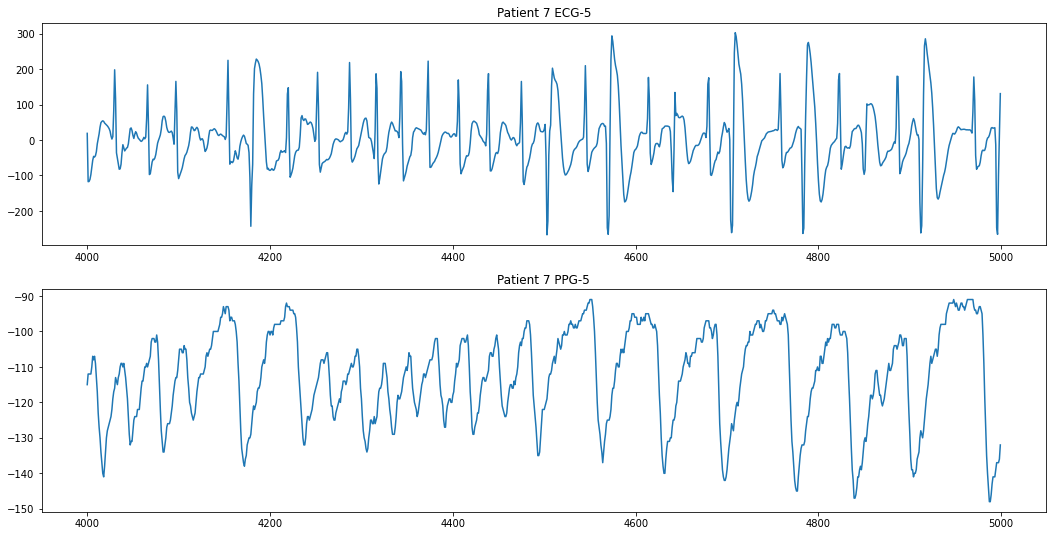

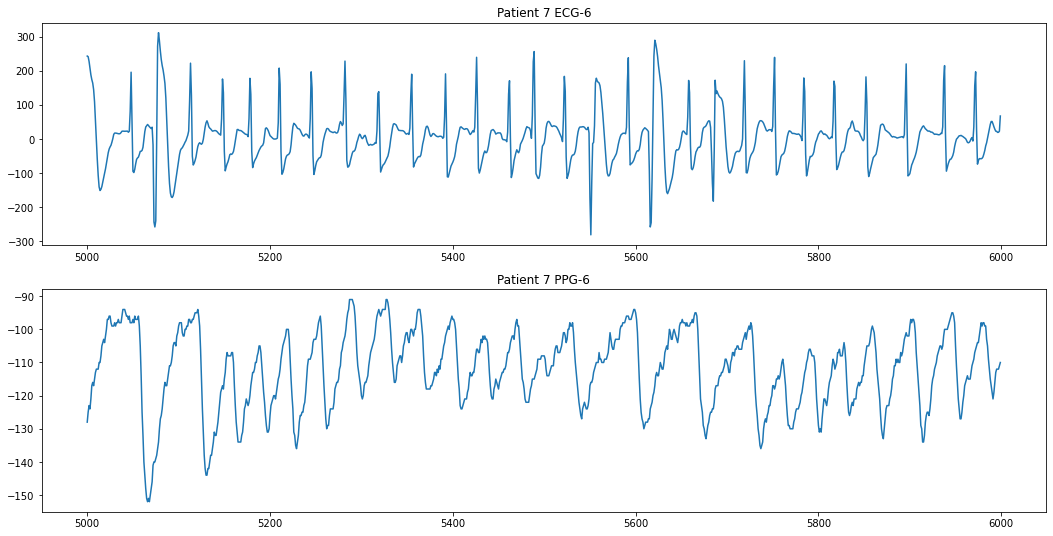

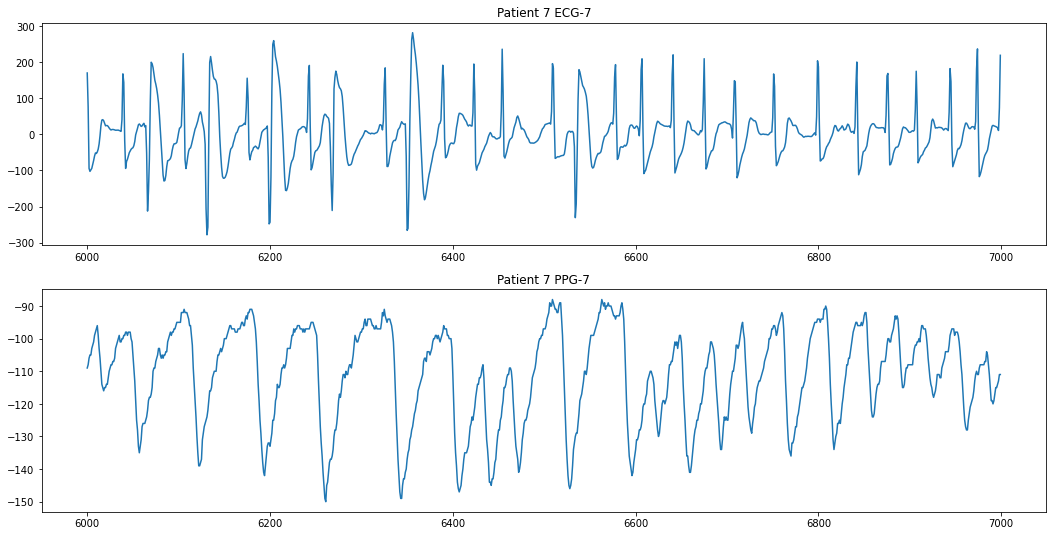

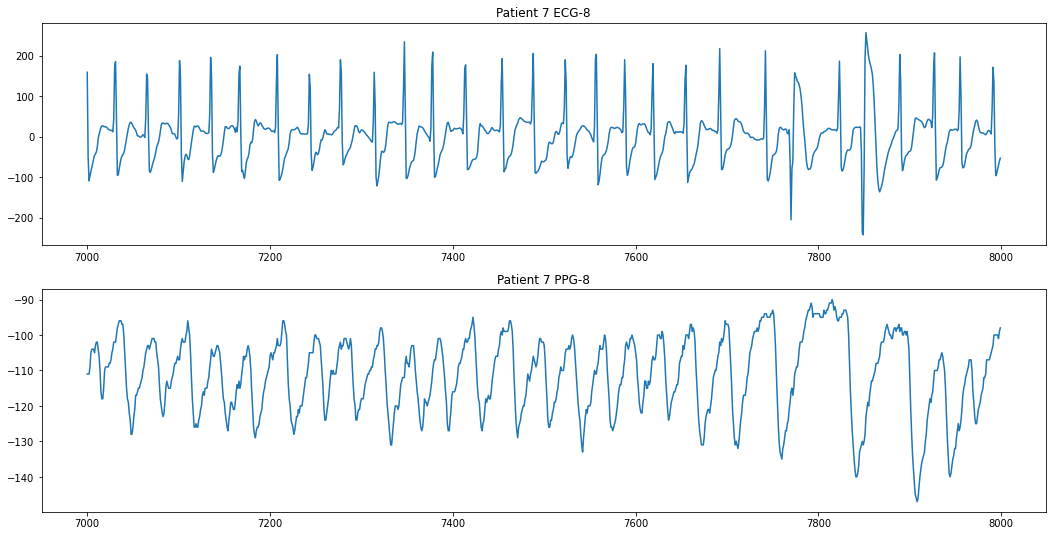

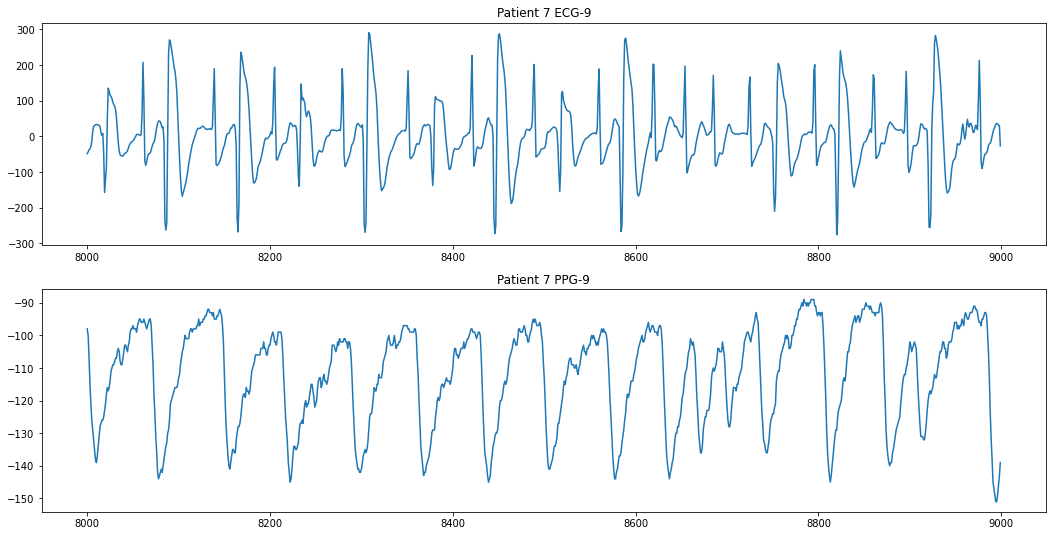

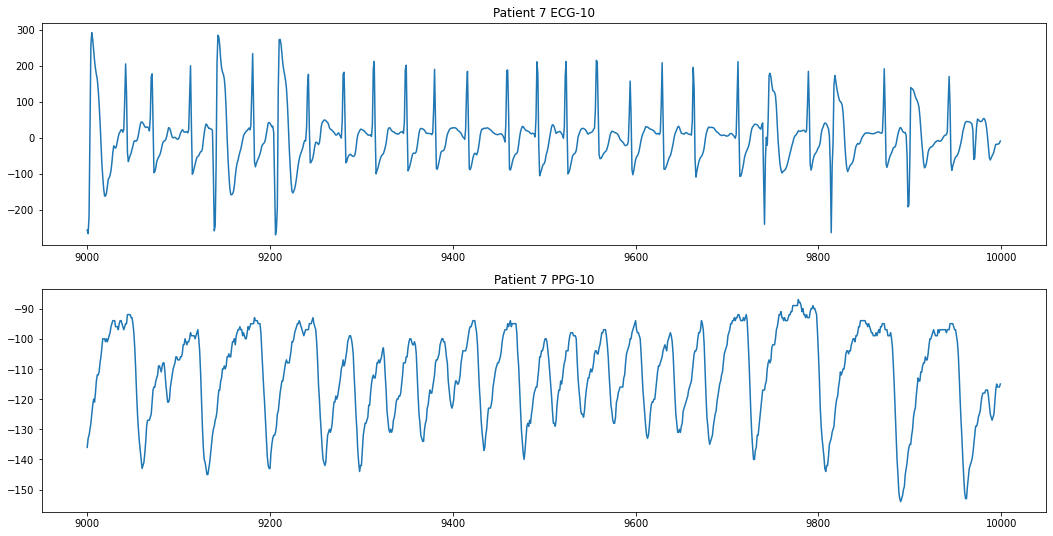

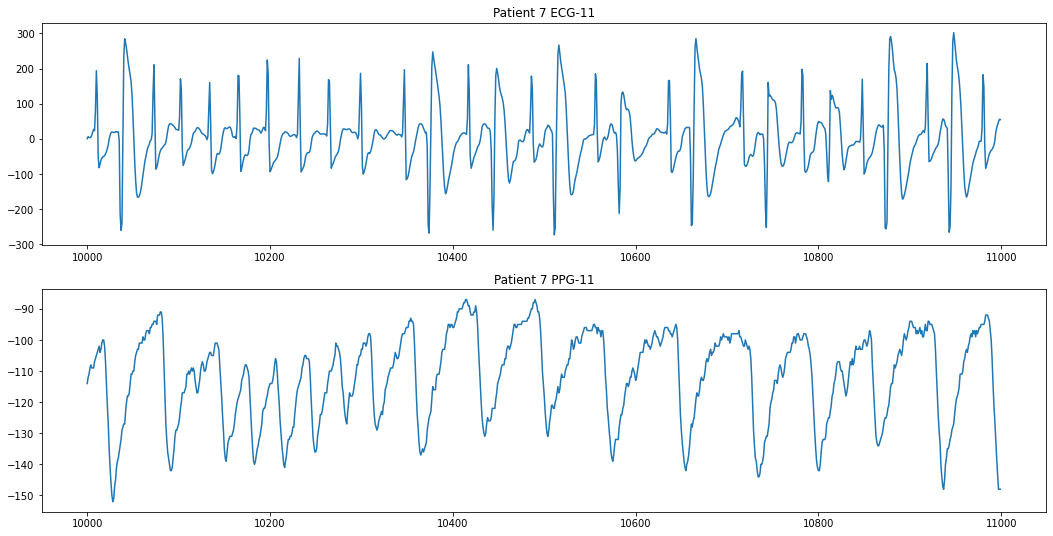

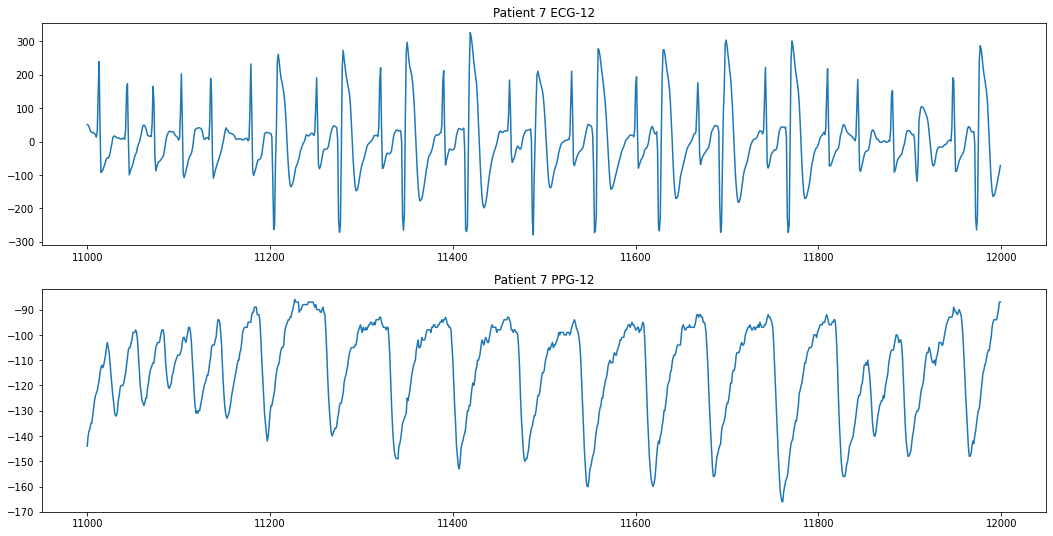

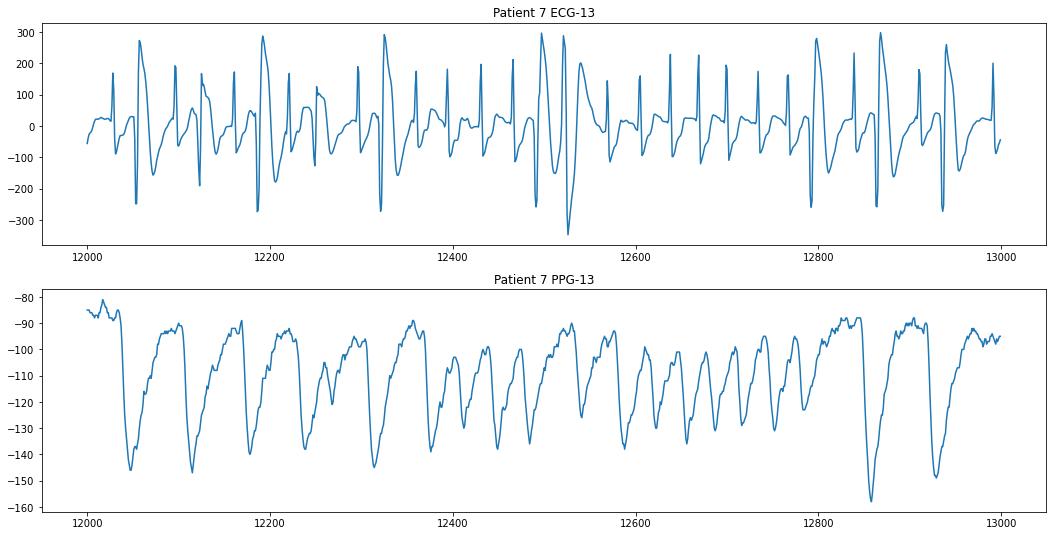

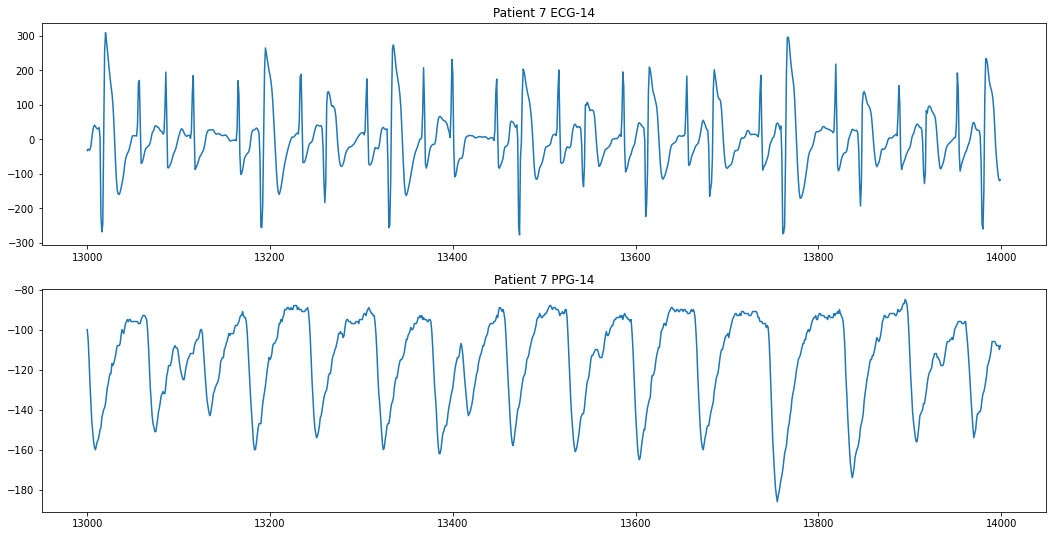

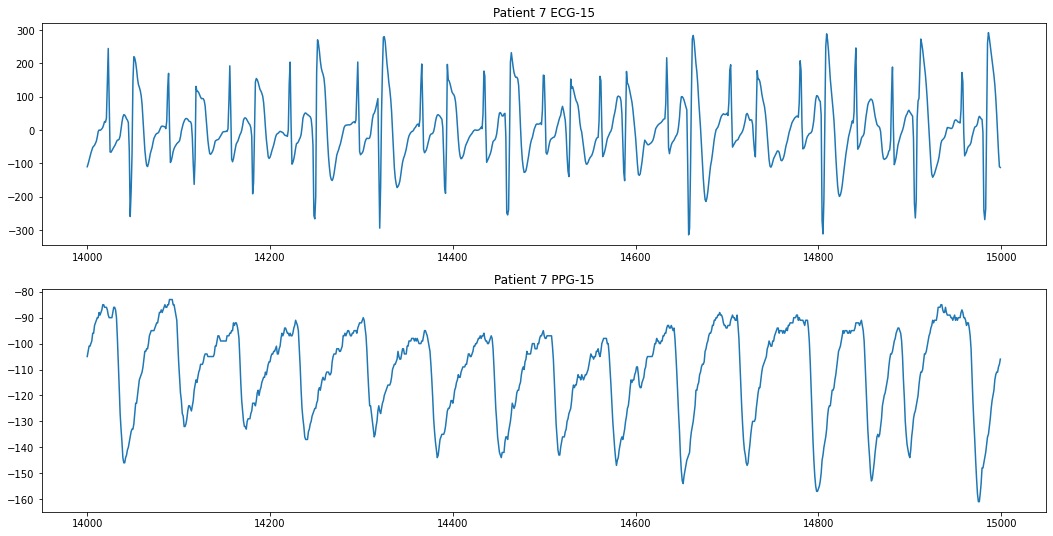

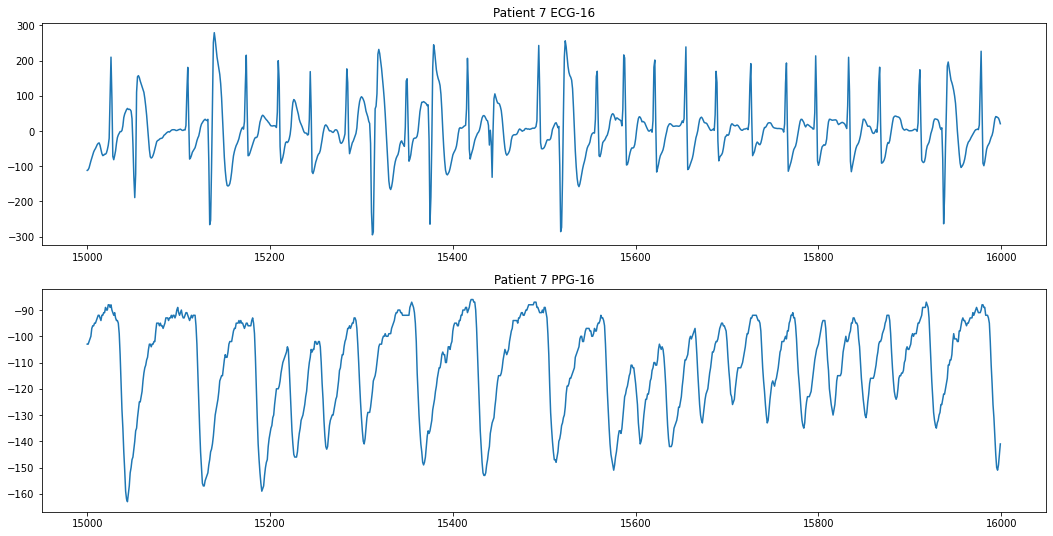

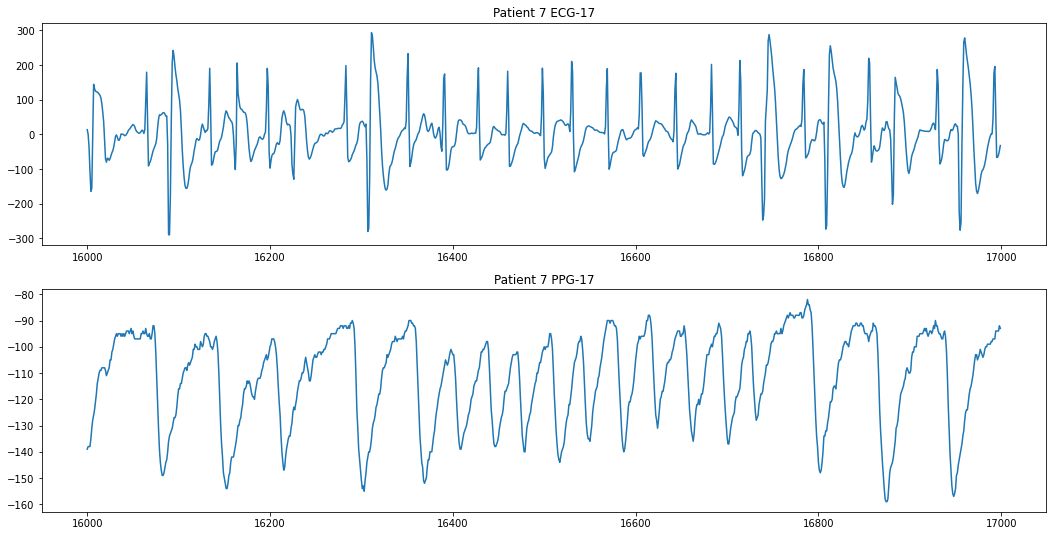

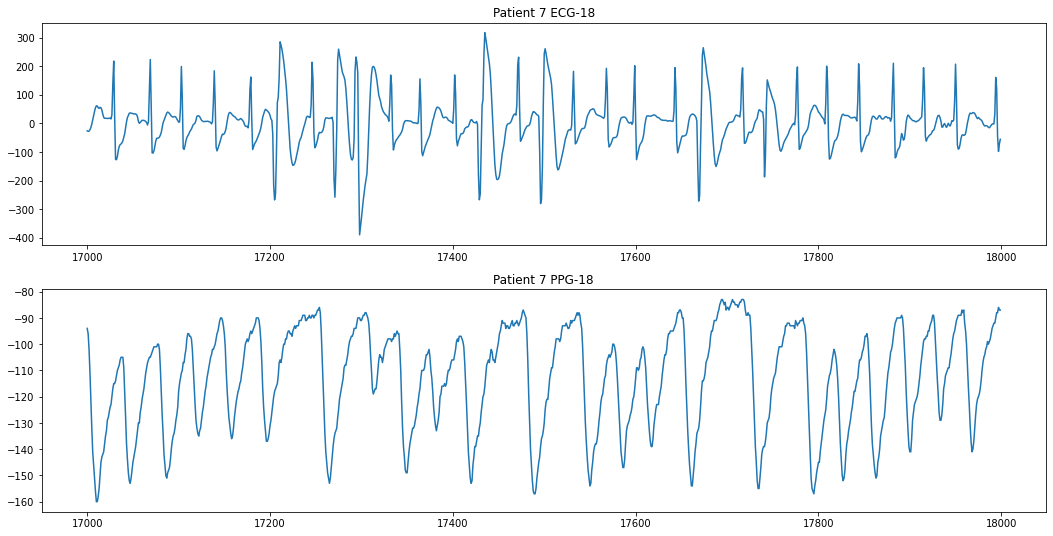

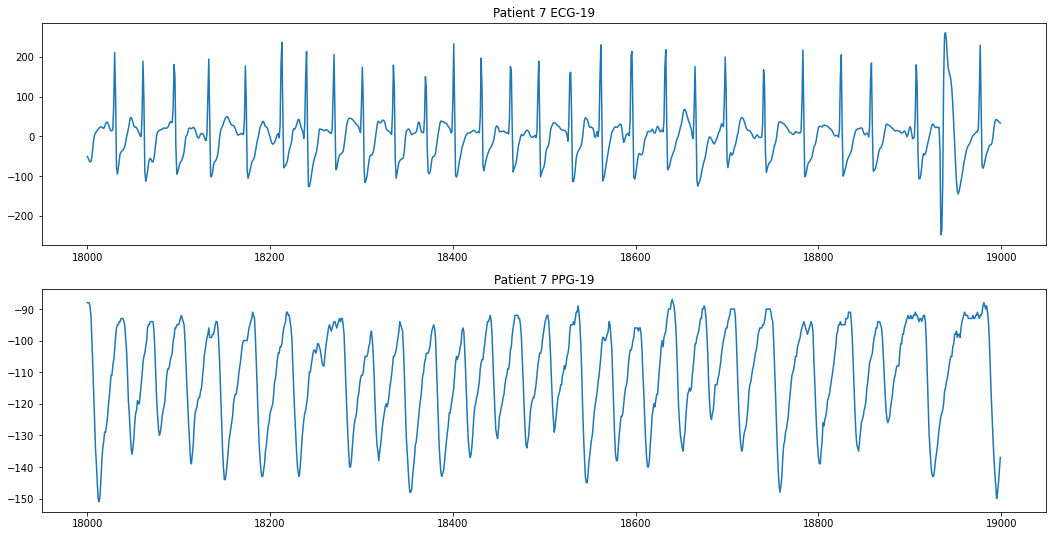

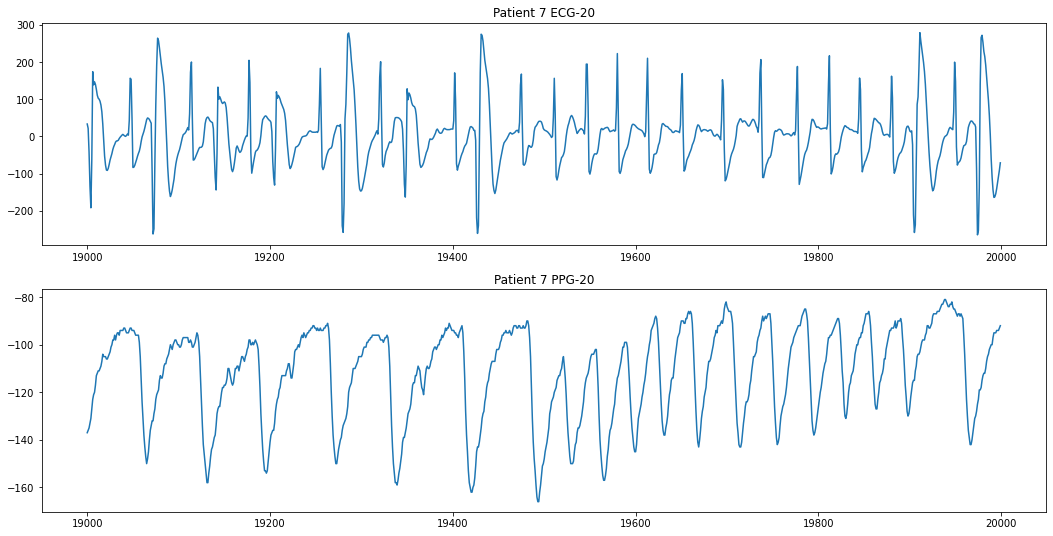

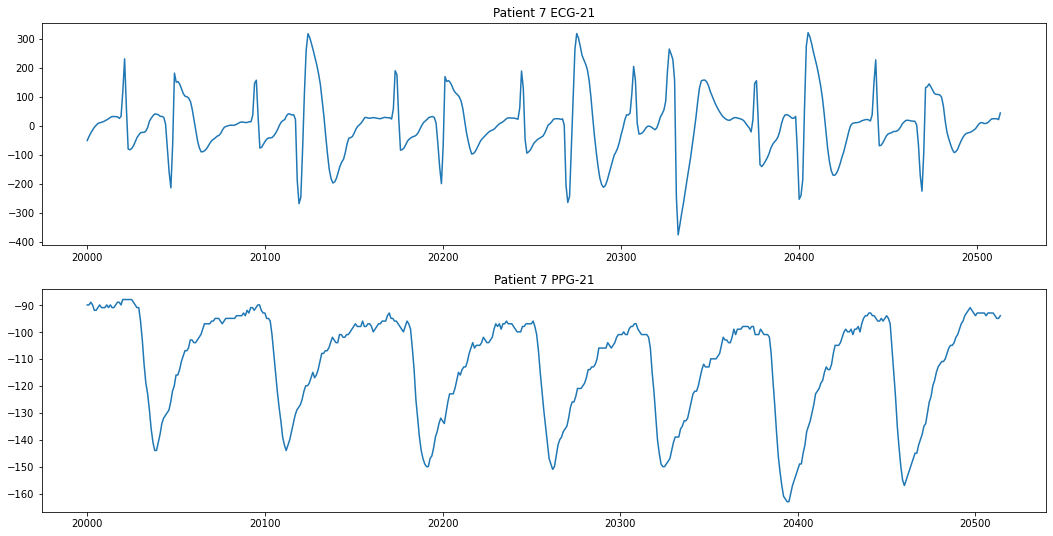

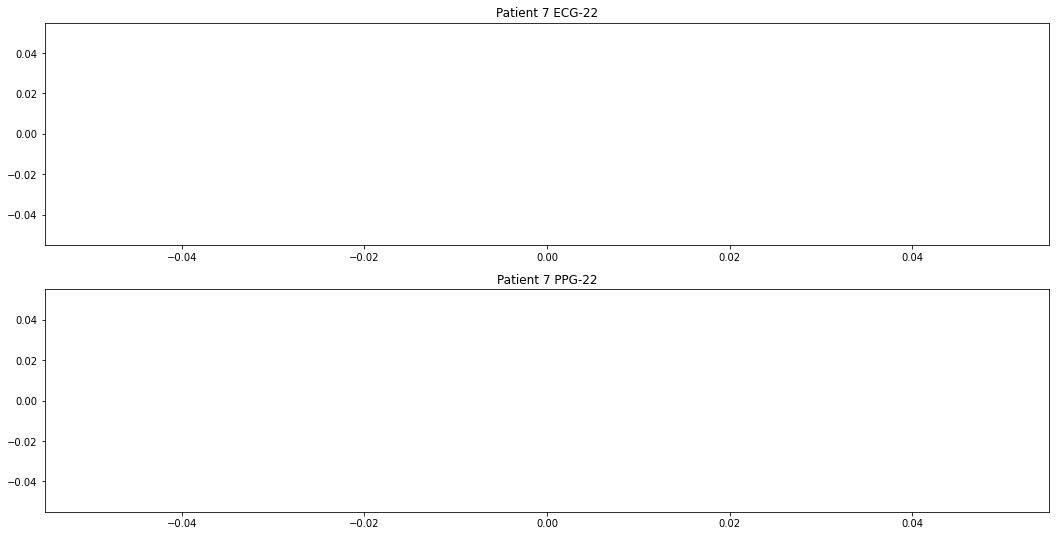

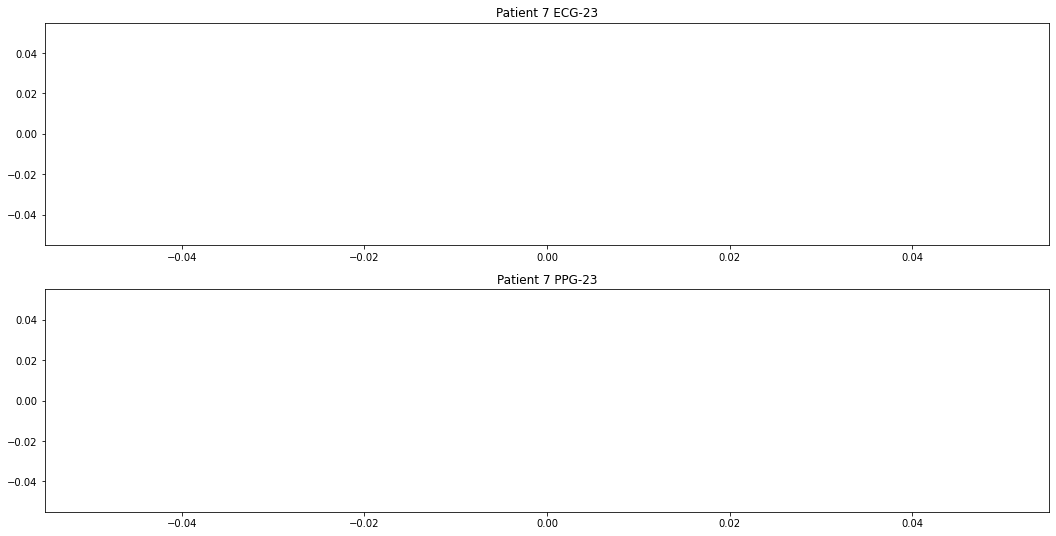

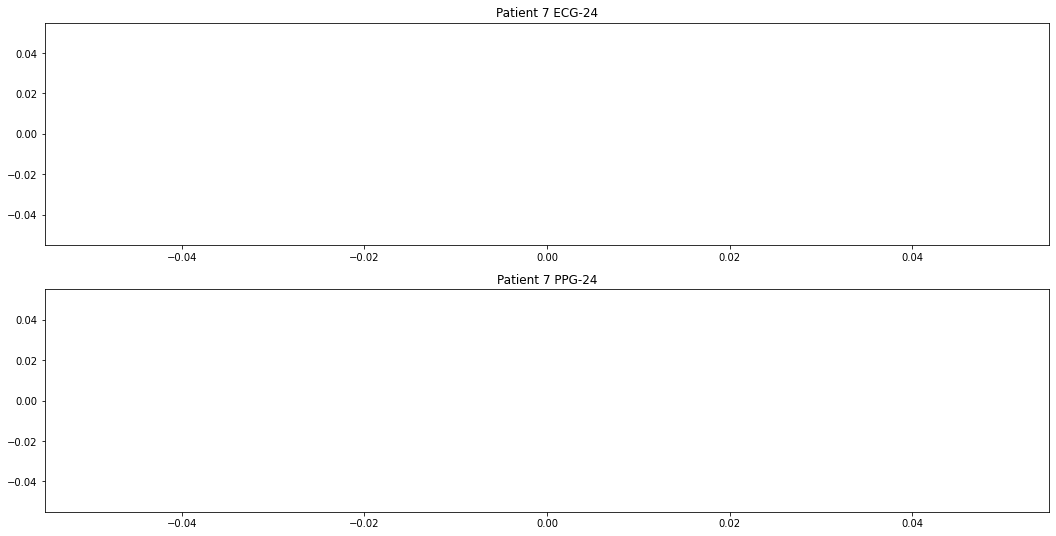

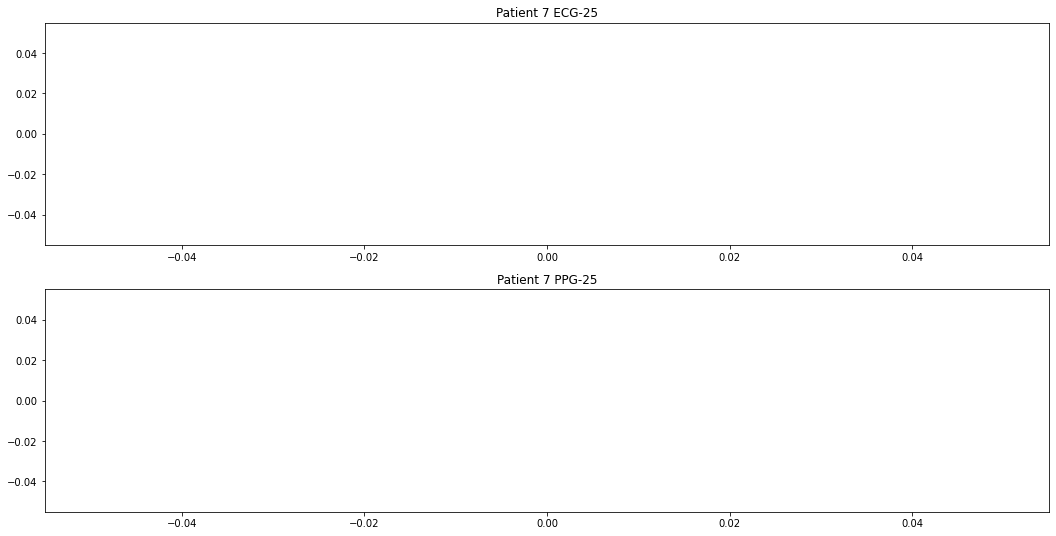

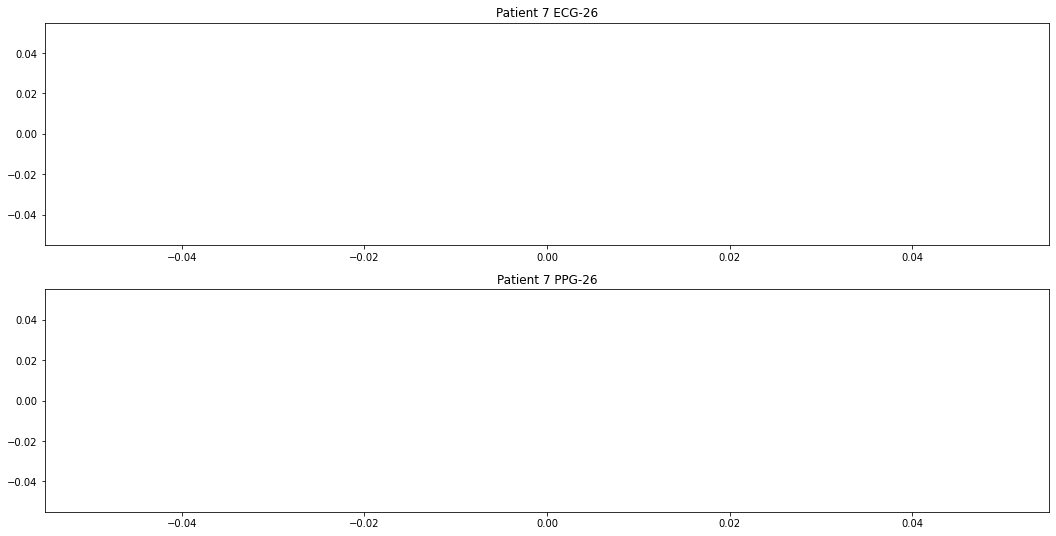

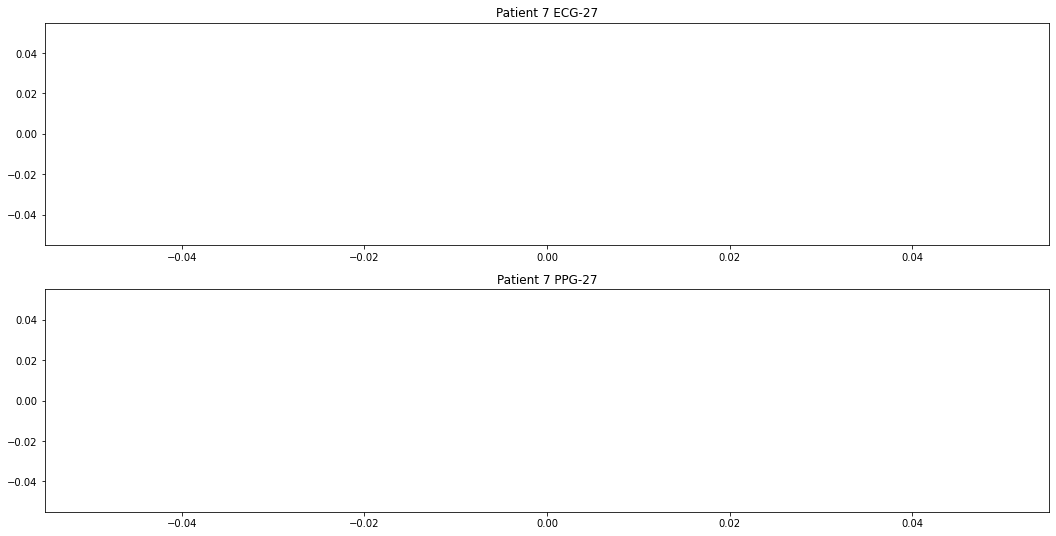

In [ ]:
for i in range(1, 28):
  sample_name_ecg = 'Patient 7 ECG-'+str(i) #atur title plottingannya
  sample_name_ppg = 'Patient 7 PPG-'+str(i) #atur title plottingannya
  limit = 1000 #per 9 detik, bebas atur aja
  sample = i
  bellow = limit * (sample-1)
  get = limit * sample
  sample_ecg = ECG[bellow:get] #ganti data ecgnya, sesuain
  sample_ppg = PPG[bellow:get] 

  plt.figure(figsize=(18, 9)) #atur ratio plot
  plt.subplot(211)
  plt.plot(sample_ecg)
  plt.title(sample_name_ecg)
  plt.subplot(212)
  plt.plot(sample_ppg)
  plt.title(sample_name_ppg)
  plt.show()
  # plt.savefig(sample_name)

In [ ]:
from google.colab import files

In [ ]:
for i in range(1, 100): 
  
  sample_name = 'ECG3_Pak Ohang-'+str(i)+'.png' #sesuain titlenya
  files.download(sample_name) #download auto

In [ ]:
#####################################################################################################################################

In [ ]:
PPGx = PPG[13051:15051]
Timex = Time[13051:15051]
sTime = Times[:2000]

In [ ]:
sample_rate = hp.get_samplerate_datetime(Timex, timeformat = '%H:%M:%S.%f')

print('sampling rate is: %.3f Hz' %sample_rate)

sampling rate is: 50.117 Hz


In [ ]:
denoise = hp.filter_signal(PPGx, 
                                cutoff = [0.8, 2.5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

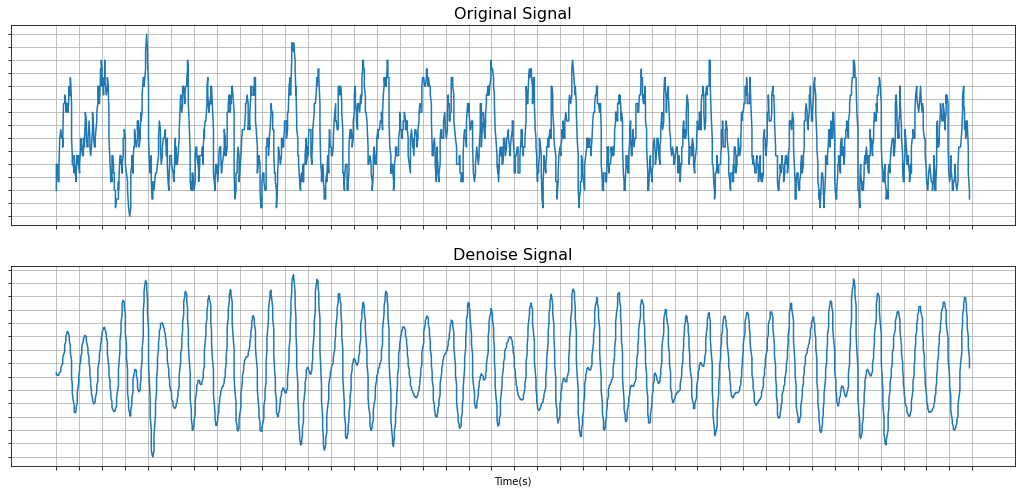

In [ ]:
plt.figure(figsize=(18, 9))

plt.subplot(211)
plt.plot(sTime, PPGx)
plt.title('Original Signal', fontsize=16)

plt.gcf().autofmt_xdate()
plt.xticks(np.arange(min(sTime), max(sTime)+1, 1.0))
plt.yticks(np.arange(min(PPGx), max(PPGx)+1, 1.5))

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

plt.grid(True);
# plt.xlabel('Time(s)')

plt.subplot(212)
plt.plot(sTime, denoise)
plt.title('Denoise Signal', fontsize=16)

plt.gcf().autofmt_xdate()
plt.xticks(np.arange(min(sTime), max(sTime)+1, 1.0))
plt.yticks(np.arange(min(denoise), max(denoise)+1, 1.0))

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

plt.grid(True)
plt.xlabel('Time(s)')

plt.savefig('Hasil Denoising P1().png')
plt.show()